# MMF Data Science project
# Group: Yuran Bo, Yuxuan(Karen) Guo, Yiling Qi

In [1]:
# import packages
from collections import Counter
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Preparation

In [2]:
# import dataset
df = pd.read_csv('../data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# check datatype
print(df.dtypes)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


In [4]:
# Check for missing data
NAN = [(c,df[c].isnull().mean().round(4)*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name','percentage(%)'])
print(NAN)  # No column has a significant amount of missing values

                   column_name  percentage(%)
0                           ID            0.0
1                    LIMIT_BAL            0.0
2                          SEX            0.0
3                    EDUCATION            0.0
4                     MARRIAGE            0.0
5                          AGE            0.0
6                        PAY_0            0.0
7                        PAY_2            0.0
8                        PAY_3            0.0
9                        PAY_4            0.0
10                       PAY_5            0.0
11                       PAY_6            0.0
12                   BILL_AMT1            0.0
13                   BILL_AMT2            0.0
14                   BILL_AMT3            0.0
15                   BILL_AMT4            0.0
16                   BILL_AMT5            0.0
17                   BILL_AMT6            0.0
18                    PAY_AMT1            0.0
19                    PAY_AMT2            0.0
20                    PAY_AMT3    

There is no missing data

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


variable 'EDUCATION' has unknown labels '0', '5', '6'\
We decide to merge these labels into label '4' (others)

In [6]:
# Check the number of the unknown labels
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
filt = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[filt, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

variable 'MARRIAGE' has unknown label 0\
We decide to merge it into label '3' (others)

In [8]:
# Check the number of the unknown labels
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
filt = df.MARRIAGE == 0
df.loc[filt, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

for 'Pay_0' to 'Pay_6', the labels '-2', '-1' both mean "paid before the due date"\
We change them to label '0' to better make sense
We also change the column name 'Pay_0' to 'Pay_1' to follow better naming convention

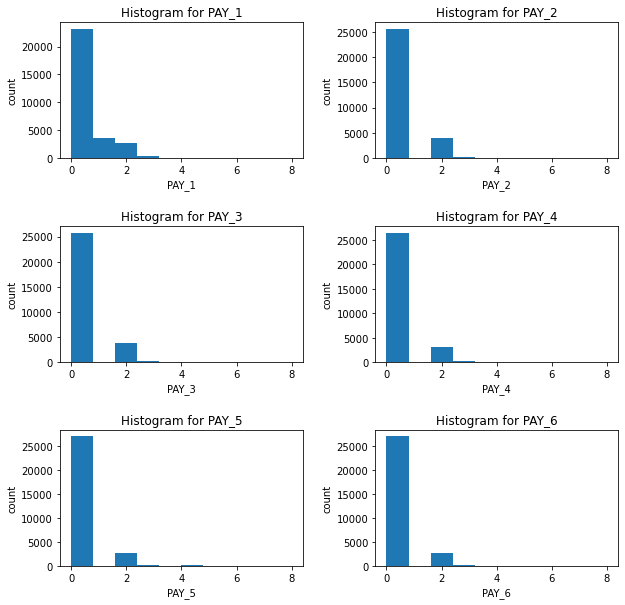

In [10]:
fig, axes = plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
i = 0
colName = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for row in axes:
    for col in row:
        filt = (df[colName[i]] == -2) | (df[colName[i]] == -1)
        df.loc[filt, colName[i]] = 0
        col.hist(df[colName[i]])
        col.set(xlabel=colName[i], ylabel='count', title='Histogram for ' + colName[i])
        i = i+1
plt.show()

In [11]:
# Change the name for the response varialbe
df.rename(columns={'default.payment.next.month':'Is default'}, inplace=True)

In [12]:
# Check again the whole dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
# Reconstruct the dataframe in the order of numeric variables, categorical variables and the response variable
# Set the numeric features
df_numeric = pd.concat([df.iloc[:,:2], df.iloc[:,5], df.iloc[:,12:-1]], axis=1)
df_numeric = df_numeric.drop(['ID'],axis=1)  # remove the 'ID' variable
print(df_numeric.head())
# Set the categorical features
df_categ = pd.concat([df.iloc[:,2:5], df.iloc[:,6:12]], axis=1)
print(df_categ.head())
# Set the response variable
df_y = df['Is default']
print(df_y.head())

   LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0    20000.0   24     3913.0     3102.0      689.0        0.0        0.0   
1   120000.0   26     2682.0     1725.0     2682.0     3272.0     3455.0   
2    90000.0   34    29239.0    14027.0    13559.0    14331.0    14948.0   
3    50000.0   37    46990.0    48233.0    49291.0    28314.0    28959.0   
4    50000.0   57     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0  
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0  
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0  
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0  
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0  
   SEX  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0    2          2      

In [14]:
# Now we have a clean dataset (excluding the 'df_ID' variable):
df_final = pd.concat([df_numeric, df_categ, df_y], axis=1,sort=False)
df_final.columns.shape

(24,)

In [15]:
# Check statistics
df_final.describe()
# No variable has very low variance

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Is default
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,1.603733,1.842267,1.557267,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.489129,0.744494,0.521405,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,1.000000


We don't remove any variables as no columns have very low variance

     Is default
SEX            
2      0.207763
1      0.241672


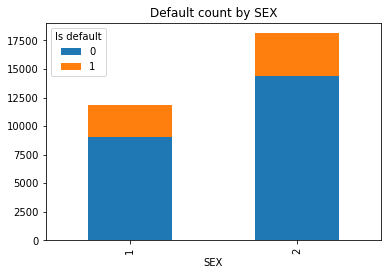

           Is default
EDUCATION            
4            0.070513
1            0.192348
2            0.237349
3            0.251576


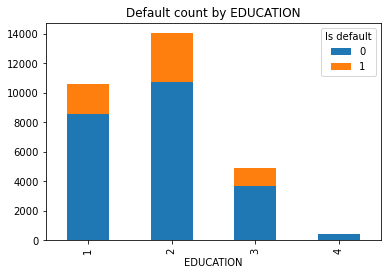

          Is default
MARRIAGE            
2           0.209283
1           0.234717
3           0.236074


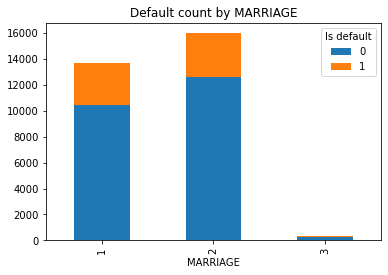

       Is default
PAY_1            
0        0.138340
1        0.339479
5        0.500000
6        0.545455
8        0.578947
4        0.684211
2        0.691414
3        0.757764
7        0.777778


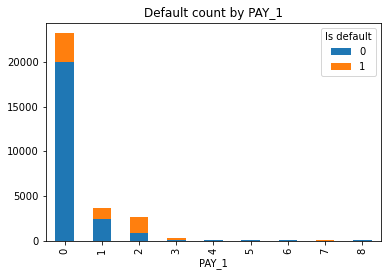

In [16]:
# Give bar plot to check the relation between each categorical variable and the response
for c in ['SEX','EDUCATION','MARRIAGE','PAY_1']:
    var = df_final.groupby([c, 'Is default']).size().unstack(1)
    var.plot(kind='bar', stacked = True, title='Default count by ' + c)
    print(df_final[[c, 'Is default']].groupby([c]).mean().sort_values(by='Is default'))
    plt.show()

It looks like there is strong correlation between these categorical variables and the response variable\
It seems that people with higher education tends to not default\
Married people tend to have default\
Males are more likely to default than females\
And people who don't pay money for a longer time tend to default

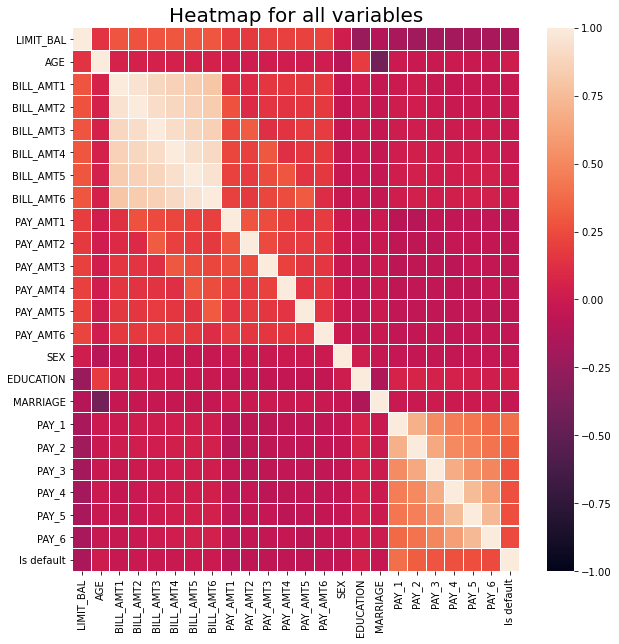

In [17]:
import seaborn as sns
# Check the correlation heatmap for our dataset
fig, ax = plt.subplots(figsize=(10,10))
corr = df_final.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
ax.set_title('Heatmap for all variables',fontsize = 20)
plt.show()

Variables 'PAY_1' to 'PAY_6' has fairly strong correlation with the response variable

In [18]:
# Check covariance matrix
cor = df_final.corr().abs().unstack()
cor_sort = cor.sort_values(kind="quicksort",ascending=True)

print(cor_sort['Is default'])


BILL_AMT6     0.005372
BILL_AMT5     0.006760
BILL_AMT4     0.010156
AGE           0.013890
BILL_AMT3     0.014076
BILL_AMT2     0.014193
BILL_AMT1     0.019644
MARRIAGE      0.027575
EDUCATION     0.033842
SEX           0.039961
PAY_AMT6      0.053183
PAY_AMT5      0.055124
PAY_AMT3      0.056250
PAY_AMT4      0.056827
PAY_AMT2      0.058579
PAY_AMT1      0.072929
LIMIT_BAL     0.153520
PAY_6         0.244437
PAY_5         0.260850
PAY_4         0.269055
PAY_3         0.286999
PAY_2         0.327093
PAY_1         0.396019
Is default    1.000000
dtype: float64


We remove features 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'AGE' as they have very low correlation with the response variable

In [19]:
df_numeric = df_numeric.drop(['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'AGE' ], axis=1)

In [20]:
# Normalizing numeric variables
sc = StandardScaler()
df_numeric = pd.DataFrame(sc.fit_transform(df_numeric),columns=df_numeric.columns)
df_numeric.head(10)

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
5,-0.905498,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381
6,2.562830,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207
7,-0.520128,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642
8,-0.211833,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130
9,-1.136720,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382


In [21]:
counter = Counter(df_y)
print(counter)

Counter({0: 23364, 1: 6636})


In [22]:
X = pd.concat([df_numeric, df_categ], axis=1,sort=False).values  # Explanatory variables df
y = df_y.values # response variables df

Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_y], axis = 1)
print(finalDf.head())

   principal component 1  principal component 2  Is default
0              -1.529620              -0.112944           1
1              -1.158998               0.077241           1
2              -0.016136              -0.925461           0
3              -0.147353              -1.000517           0
4               0.454557              -0.210271           0


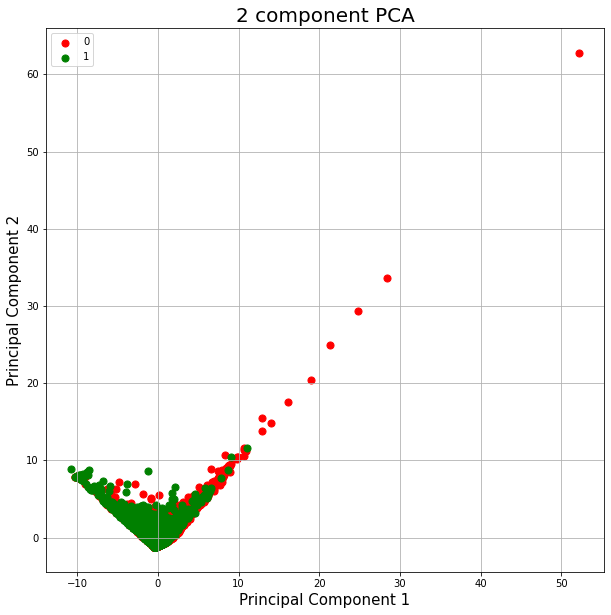

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0, 1]
colors = ['r', 'g']
for clas, color in zip(classes,colors):
    indx = finalDf['Is default'] == clas
    ax.scatter(finalDf.loc[indx, 'principal component 1']
               , finalDf.loc[indx, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()

In [25]:
# the principal components of explanatory variables and the reponse variable
X1 = principalDf.values
y1 = df_y.values

#  Fit Imbalanced Classification Models: SMOTEENN vs SMOTE

In [26]:
# train & test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

In [28]:
# Choose our model "KNeighborsClassifier"

model =  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- No sampling used

In [29]:
# model fitting and prediction results
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7040
           1       0.61      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

col_0     0    1
row_0           
0      6580  460
1      1254  706


- SMOTEENN resampling

In [30]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()
X_SMOTEENN, y_SMOTEENN = smoteenn.fit_sample(X_train, y_train)

In [31]:
# resampling results
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_SMOTEENN))

Before SMOTE:  Counter({0: 16324, 1: 4676})
After SMOTE:  Counter({1: 11353, 0: 8351})


In [33]:
# model fitting and prediction results
model.fit(X_SMOTEENN, y_SMOTEENN)
y_pred_SMOTEENN= model.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred_SMOTEENN))
print(pd.crosstab(y_test, y_pred_SMOTEENN))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83      7040
           1       0.45      0.60      0.51      1960

    accuracy                           0.75      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.75      0.77      9000

col_0     0     1
row_0            
0      5605  1435
1       784  1176


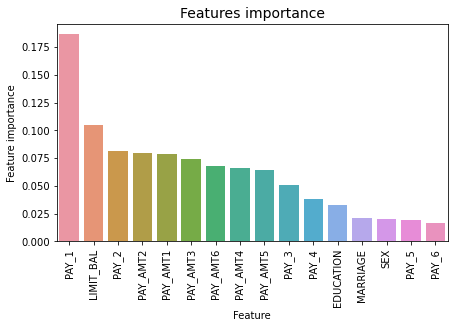

In [34]:
data = pd.concat([df_numeric, df_categ], axis=1)
predictors = list(data.columns) 
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_.tolist()})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

- SMOTE resampling

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_SMOTE, y_SMOTE = smote.fit_sample(X_train, y_train)

In [36]:
# resampling results
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_SMOTE))

Before SMOTE:  Counter({0: 16324, 1: 4676})
After SMOTE:  Counter({1: 16324, 0: 16324})


In [37]:
# model fitting and prediction results
model.fit(X_SMOTE, y_SMOTE)
y_pred_SMOTE= model.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred_SMOTE))
print(pd.crosstab(y_test, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7040
           1       0.51      0.47      0.49      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.67      0.68      9000
weighted avg       0.78      0.79      0.78      9000

col_0     0    1
row_0           
0      6167  873
1      1040  920


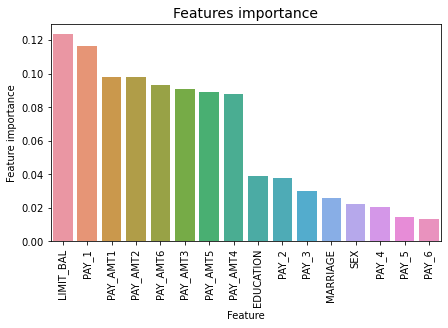

In [38]:
data = pd.concat([df_numeric, df_categ], axis=1)
predictors = list(data.columns) 
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_.tolist()})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 